In [1]:

!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-90zq7kin
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-90zq7kin
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')
data.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)

In [4]:
import pycaret
pycaret.__version__

'3.4.0'

In [9]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123,use_gpu= True, experiment_name='insurance1')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [10]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2692.5967,23296960.1234,4824.6103,0.8363,0.4515,0.3206,0.1760
rf,Random Forest Regressor,2772.9025,25277191.6000,5024.9162,0.8220,0.4688,0.3254,0.4760
lightgbm,Light Gradient Boosting Machine,3028.4412,25859569.7888,5084.2045,0.8169,0.5243,0.3773,1.5640
ada,AdaBoost Regressor,4186.0485,28235870.1457,5310.3789,0.8023,0.6167,0.6977,0.0820
et,Extra Trees Regressor,2858.1136,28778858.5534,5355.7976,0.8006,0.4938,0.3380,0.3240
xgboost,Extreme Gradient Boosting,3273.7720,31646071.6000,5623.5006,0.7753,0.5858,0.4148,0.2780
lasso,Lasso Regression,4316.4734,38501643.0705,6193.2779,0.7346,0.6704,0.4435,0.1100
llar,Lasso Least Angle Regression,4316.6204,38502515.9192,6193.3530,0.7346,0.6726,0.4435,0.0680
br,Bayesian Ridge,4325.2565,38508496.3681,6193.7398,0.7346,0.6509,0.4450,0.0720
lr,Linear Regression,4316.3678,38503541.5412,6193.4557,0.7345,0.6604,0.4434,0.2720


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [11]:
tuned = tune_model(best_model)
print(best_model)
print(tuned)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3381.8977,29784640.9974,5457.5307,0.8221,0.5658,0.4746
1,3521.9179,33160862.8554,5758.5469,0.8072,0.5228,0.3915
2,3706.5756,35854979.4177,5987.9028,0.5460,0.7968,0.5367
3,3845.1139,33132623.3741,5756.0945,0.7233,0.7606,0.5996
4,3801.3662,39868499.5152,6314.1507,0.7035,0.6453,0.4905
5,3617.8384,30867730.0487,5555.8735,0.8014,0.5108,0.3681
6,3353.2437,27372536.3200,5231.8769,0.8137,0.5943,0.4230
7,3194.4748,30683404.6026,5539.2603,0.8313,0.7119,0.3353
8,3013.4542,23912385.3280,4890.0292,0.8455,0.5965,0.5120


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GradientBoostingRegressor(random_state=123)
GradientBoostingRegressor(random_state=123)


In [12]:
final = finalize_model(tuned)


In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

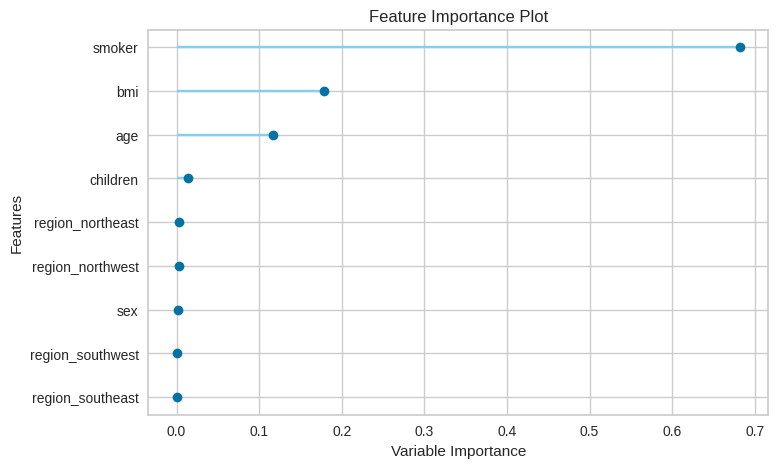

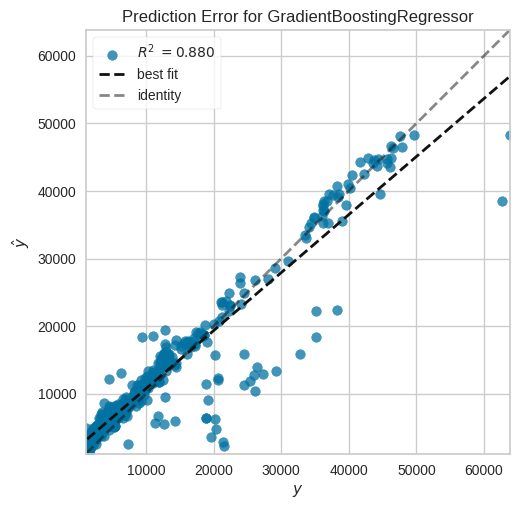

In [15]:
# visualizing models
plot_model(best_model, plot='feature')
plot_model(best_model, plot = 'error')

In [16]:
preds = predict_model(final)
preds.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1868.8571,11410413.2895,3377.9303,0.9201,0.3024,0.2214


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10205.667203
319,32,male,37.334999,1,no,northeast,4667.607422,7273.443005
314,27,female,31.400000,0,yes,southwest,34838.871094,35355.008190
150,35,male,24.129999,1,no,northwest,5125.215820,6019.324062
336,60,male,25.740000,0,no,southeast,12142.578125,14666.982425


In [17]:
save_model(final, 'regression_insurance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(